In [1]:
pip install pandas pyarrow

  Using cached pyarrow-21.0.0-cp313-cp313-win_amd64.whl.metadata (3.4 kB)
  Using cached numpy-2.3.3-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---- ----------------------------------- 1.3/11.0 MB 8.1 MB/s eta 0:00:02
   ---------- ----------------------------- 2.9/11.0 MB 7.8 MB/s eta 0:00:02
   ----------------- ---------------------- 4.7/11.0 MB 8.0 MB/s eta 0:00:01
   ----------------------- ---------------- 6.6/11.0 MB 8.3 MB/s eta 0:00:01
   ------------------------------ --------- 8.4/11.0 MB 8.5 MB/s eta 0:00:01
   -------------------------------------- - 10.5/11.0 MB 8.6 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 8.5 MB/s  0:00:01
Using cached pyarrow-21.0.0-cp313-cp313-win_amd64.whl (26.1 MB)
Using cached numpy-2.3.3-cp313-cp313-win_amd64.whl 

In [4]:
import pandas as pd

# Cargar el archivo Parquet
df = pd.read_parquet("tabular_data.parquet")

pd.set_option('display.max_columns', None)


# EDA básico
print(df.head())        




           run_id  computed_success  computed_unproductive  computed_defect  \
0  run_d3022fabc0             False                   True            False   
1  run_b1791fa139              True                  False            False   
2  run_a58303860d              True                  False            False   
3  run_5037a711a5              True                  False            False   
4  run_2c4f2ff48c              True                  False            False   

   match_risk_features.initial.itemLengthPerception  \
0                                          0.168371   
1                                          0.201327   
2                                          0.167658   
3                                          0.200661   
4                                          0.117739   

   match_risk_features.initial.itemHeightPerception  \
0                                          0.094170   
1                                          0.145505   
2                            

In [5]:
# Información general
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72652 entries, 0 to 72651
Columns: 236 entries, run_id to match_output.stowStrategy.binSweep.binHSweepWaypoints
dtypes: bool(9), float64(178), object(49)
memory usage: 126.4+ MB
None


In [6]:
df.isnull().sum().sort_values(ascending=False).head(26)


match_output.stowStrategy.binSweep.binHSweepWaypoints          56964
match_output.stowStrategy.binSweep.insertStrategy              56964
match_output.stowStrategy.slotWedge.itemInsertStrategy         16710
match_output.stowStrategy.slotWedge.yBinToSlotStartM           16710
match_output.stowStrategy.slotWedge.isWedgeV2                  16710
semantic_summary.operatorAnnotation.isStowedItemAmnesty            1
semantic_summary.operatorAnnotation.isStowedItemInBin              1
semantic_summary.operatorAnnotation.isBinItemAmnesty               1
semantic_summary.operatorAnnotation.isStowedItemDamage             1
semantic_summary.skumasterAttr.itemPackageShape                    1
semantic_summary.skumasterAttr.isConveyable                        1
semantic_summary.skumasterAttr.isFoldable                          1
semantic_summary.operatorAnnotation.amnestyBlockingWorkcell        1
semantic_summary.operatorAnnotation.amnestyBlockingDrive           1
semantic_summary.operatorAnnotatio

In [7]:
#verifica si cada columna contiene tipos de datos "hashable" intentando calcular el número de valores únicos 
for col in df.select_dtypes('object').columns:
    try:
        df[col].nunique()
    except TypeError:
        print(f"Column '{col}' contains unhashable types.")

Column 'semantic_summary.operatorAnnotation.etiquetteViolations' contains unhashable types.
Column 'match_output.stowStrategy.pBinToProfileBottom' contains unhashable types.
Column 'match_output.stowStrategy.pBinToProfileTop' contains unhashable types.
Column 'match_output.stowStrategy.binSweep.binHSweepWaypoints' contains unhashable types.


In [8]:
#se creo una nueva columna donde se ve si hubo alguna violacion o no 
df['has_etiquette_violation'] = df['semantic_summary.operatorAnnotation.etiquetteViolations'].apply(lambda x: len(x) > 0 if x is not None else False)

In [ ]:
#elimino la ultima columna porque no hay valores 
df['match_output.stowStrategy.binSweep.binHSweepWaypoints'].apply(lambda x: len(x) if isinstance(x, list) else 0).value_counts()


match_output.stowStrategy.binSweep.binHSweepWaypoints
0    72652
Name: count, dtype: int64

In [10]:
df.drop(columns=['match_output.stowStrategy.binSweep.binHSweepWaypoints'], inplace=True)


In [11]:
#verifica si cada columna contiene tipos de datos "hashable" intentando calcular el número de valores únicos 
for col in df.select_dtypes('object').columns:
    try:
        df[col].nunique()
    except TypeError:
        print(f"Column '{col}' contains unhashable types.")

Column 'semantic_summary.operatorAnnotation.etiquetteViolations' contains unhashable types.
Column 'match_output.stowStrategy.pBinToProfileBottom' contains unhashable types.
Column 'match_output.stowStrategy.pBinToProfileTop' contains unhashable types.


In [12]:
cols_to_drop = [
    'match_output.stowStrategy.pBinToProfileBottom',
    'match_output.stowStrategy.pBinToProfileTop',
    'match_output.stowStrategy.binSweep.binHSweepWaypoints',
    'semantic_summary.operatorAnnotation.etiquetteViolations' # Added this column
]

# Filter out columns that are not in the DataFrame
existing_cols_to_drop = [col for col in cols_to_drop if col in df.columns]

if existing_cols_to_drop:
    df.drop(columns=existing_cols_to_drop, inplace=True)
    print(f"Dropped columns: {existing_cols_to_drop}")
else:
    print("None of the specified columns were found in the DataFrame.")

Dropped columns: ['match_output.stowStrategy.pBinToProfileBottom', 'match_output.stowStrategy.pBinToProfileTop', 'semantic_summary.operatorAnnotation.etiquetteViolations']


In [13]:
#verifica si cada columna contiene tipos de datos "hashable" intentando calcular el número de valores únicos 
for col in df.select_dtypes('object').columns:
    try:
        df[col].nunique()
    except TypeError:
        print(f"Column '{col}' contains unhashable types.")

In [ ]:
df = pd.get_dummies(df, drop_first=True)
#One-Hot Encoding
#me doy cuenta que estoy trabajando con demasiados datos.

In [ ]:
numeric_df = df.select_dtypes(include=['number'])
#elegi trabajar solo con variables numericas

In [28]:
#eleccion del taregt
target = 'computed_success'

if target not in numeric_df.columns:
    numeric_df[target] = df[target].astype(int)  # o .astype(float) si lo prefieres


In [29]:
threshold = int(0.9 * len(numeric_df))
numeric_df = numeric_df.dropna(axis=1, thresh=threshold)


In [30]:
numeric_df = numeric_df.fillna(numeric_df.mean(numeric_only=True))


In [ ]:
#para volver a introducir algunas variables categoricas
important_cols = ['object_type', 'bin_type', 'success']
reduced_df = pd.concat([df[important_cols], numeric_df], axis=1)


In [ ]:
df.info(memory_usage='deep')
numeric_df.info(memory_usage='deep')
#revision de la memoria 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72652 entries, 0 to 72651
Columns: 145839 entries, computed_success to match_output.stowStrategy.binSweep.insertStrategy_ENGAGE_WALL_INSERT
dtypes: bool(145661), float64(178)
memory usage: 10.0 GB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72652 entries, 0 to 72651
Columns: 178 entries, match_risk_features.initial.itemLengthPerception to computed_success
dtypes: float64(177), int64(1)
memory usage: 98.7 MB


In [35]:
df = numeric_df.copy()
target = 'computed_success'



In [46]:
# Primeras filas del dataset
df.head(10)


,match_risk_features.initial.itemLengthPerception,match_risk_features.initial.itemHeightPerception,match_risk_features.initial.itemWidthPerception,match_risk_features.initial.itemLengthManifest,match_risk_features.initial.itemHeightManifest,match_risk_features.initial.itemWidthManifest,match_risk_features.initial.binDepth,match_risk_features.initial.binWidth,match_risk_features.initial.binHeight,match_risk_features.initial.binVolume,match_risk_features.initial.binGauPerception,match_risk_features.initial.gluScore,match_risk_features.initial.gcuScore,match_risk_features.initial.clippedWidth,match_risk_features.initial.clippedVolume,match_risk_features.initial.binGluManifest,match_risk_features.initial.binGauManifest,match_risk_features.initial.binGcuManifest,match_risk_features.initial.binInsertScore,match_risk_features.initial.maxSlotWidthType,match_risk_features.initial.stowableWidthManifest,match_risk_features.initial.stowableVolumeManifest,match_risk_features.initial.binOpenDzTop,match_risk_features.initial.binOpenDzBottom,match_risk_features.initial.maxL3SlotWidth,match_risk_features.initial.itemHeightRatioManifest,match_risk_features.initial.itemWidthRatioManifest,match_risk_features.initial.itemHeightRatioPerception,match_risk_features.initial.itemWidthRatioPerception,match_risk_features.initial.slotWidth,match_risk_features.initial.itemWidthMarginManifest,match_risk_features.initial.itemHeightMarginManifest,match_risk_features.initial.itemAreaMarginManifest,match_risk_features.initial.itemWidthMarginPerception,match_risk_features.initial.itemHeightMarginPerception,match_risk_features.initial.itemAreaMarginPerception,match_risk_features.initial.eoatHeightMarginManifest,match_risk_features.initial.eoatHeightMarginPerception,match_risk_features.initial.leftWallDy,match_risk_features.initial.rightWallDy,match_risk_features.initial.mlo,match_risk_features.initial.dlo,match_risk_features.initial.dao,match_risk_features.initial.dco,match_risk_features.initial.dloFlip,match_risk_features.initial.dloL2,match_risk_features.initial.dloStack,match_risk_features.initial.dloSweep,match_risk_features.initial.mao,match_risk_features.initial.mco,match_risk_features.initial.tao,match_risk_features.initial.tco,match_risk_features.initial.tlo,match_risk_features.initial.weightKg,match_risk_features.itemLengthPerception,match_risk_features.itemHeightPerception,match_risk_features.itemWidthPerception,match_risk_features.itemLengthManifest,match_risk_features.itemHeightManifest,match_risk_features.itemWidthManifest,match_risk_features.binDepth,match_risk_features.binWidth,match_risk_features.binHeight,match_risk_features.binVolume,match_risk_features.binGauPerception,match_risk_features.gluScore,match_risk_features.gcuScore,match_risk_features.clippedWidth,match_risk_features.clippedVolume,match_risk_features.binGluManifest,match_risk_features.binGauManifest,match_risk_features.binGcuManifest,match_risk_features.binInsertScore,match_risk_features.maxSlotWidthType,match_risk_features.stowableWidthManifest,match_risk_features.stowableVolumeManifest,match_risk_features.binOpenDzTop,match_risk_features.binOpenDzBottom,match_risk_features.maxL3SlotWidth,match_risk_features.itemHeightRatioManifest,match_risk_features.itemWidthRatioManifest,match_risk_features.itemHeightRatioPerception,match_risk_features.itemWidthRatioPerception,match_risk_features.slotWidth,match_risk_features.itemWidthMarginManifest,match_risk_features.itemHeightMarginManifest,match_risk_features.itemAreaMarginManifest,match_risk_features.itemWidthMarginPerception,match_risk_features.itemHeightMarginPerception,match_risk_features.itemAreaMarginPerception,match_risk_features.eoatHeightMarginManifest,match_risk_features.eoatHeightMarginPerception,match_risk_features.leftWallDy,match_risk_features.rightWallDy,match_risk_features.mlo,match_risk_features.dlo,match_risk_features.dao,match_risk_features.dco,match_risk_features.dloFlip,match_risk_features.dloL2,match_risk_features.dloSta

In [47]:
# Información sobre tipos de datos y valores nulos
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72652 entries, 0 to 72651
Columns: 178 entries, match_risk_features.initial.itemLengthPerception to computed_success
dtypes: float64(177), int64(1)
memory usage: 98.7 MB


In [48]:
# Estadísticas descriptivas básicas
df.describe()

,match_risk_features.initial.itemLengthPerception,match_risk_features.initial.itemHeightPerception,match_risk_features.initial.itemWidthPerception,match_risk_features.initial.itemLengthManifest,match_risk_features.initial.itemHeightManifest,match_risk_features.initial.itemWidthManifest,match_risk_features.initial.binDepth,match_risk_features.initial.binWidth,match_risk_features.initial.binHeight,match_risk_features.initial.binVolume,match_risk_features.initial.binGauPerception,match_risk_features.initial.gluScore,match_risk_features.initial.gcuScore,match_risk_features.initial.clippedWidth,match_risk_features.initial.clippedVolume,match_risk_features.initial.binGluManifest,match_risk_features.initial.binGauManifest,match_risk_features.initial.binGcuManifest,match_risk_features.initial.binInsertScore,match_risk_features.initial.maxSlotWidthType,match_risk_features.initial.stowableWidthManifest,match_risk_features.initial.stowableVolumeManifest,match_risk_features.initial.binOpenDzTop,match_risk_features.initial.binOpenDzBottom,match_risk_features.initial.maxL3SlotWidth,match_risk_features.initial.itemHeightRatioManifest,match_risk_features.initial.itemWidthRatioManifest,match_risk_features.initial.itemHeightRatioPerception,match_risk_features.initial.itemWidthRatioPerception,match_risk_features.initial.slotWidth,match_risk_features.initial.itemWidthMarginManifest,match_risk_features.initial.itemHeightMarginManifest,match_risk_features.initial.itemAreaMarginManifest,match_risk_features.initial.itemWidthMarginPerception,match_risk_features.initial.itemHeightMarginPerception,match_risk_features.initial.itemAreaMarginPerception,match_risk_features.initial.eoatHeightMarginManifest,match_risk_features.initial.eoatHeightMarginPerception,match_risk_features.initial.leftWallDy,match_risk_features.initial.rightWallDy,match_risk_features.initial.mlo,match_risk_features.initial.dlo,match_risk_features.initial.dao,match_risk_features.initial.dco,match_risk_features.initial.dloFlip,match_risk_features.initial.dloL2,match_risk_features.initial.dloStack,match_risk_features.initial.dloSweep,match_risk_features.initial.mao,match_risk_features.initial.mco,match_risk_features.initial.tao,match_risk_features.initial.tco,match_risk_features.initial.tlo,match_risk_features.initial.weightKg,match_risk_features.itemLengthPerception,match_risk_features.itemHeightPerception,match_risk_features.itemWidthPerception,match_risk_features.itemLengthManifest,match_risk_features.itemHeightManifest,match_risk_features.itemWidthManifest,match_risk_features.binDepth,match_risk_features.binWidth,match_risk_features.binHeight,match_risk_features.binVolume,match_risk_features.binGauPerception,match_risk_features.gluScore,match_risk_features.gcuScore,match_risk_features.clippedWidth,match_risk_features.clippedVolume,match_risk_features.binGluManifest,match_risk_features.binGauManifest,match_risk_features.binGcuManifest,match_risk_features.binInsertScore,match_risk_features.maxSlotWidthType,match_risk_features.stowableWidthManifest,match_risk_features.stowableVolumeManifest,match_risk_features.binOpenDzTop,match_risk_features.binOpenDzBottom,match_risk_features.maxL3SlotWidth,match_risk_features.itemHeightRatioManifest,match_risk_features.itemWidthRatioManifest,match_risk_features.itemHeightRatioPerception,match_risk_features.itemWidthRatioPerception,match_risk_features.slotWidth,match_risk_features.itemWidthMarginManifest,match_risk_features.itemHeightMarginManifest,match_risk_features.itemAreaMarginManifest,match_risk_features.itemWidthMarginPerception,match_risk_features.itemHeightMarginPerception,match_risk_features.itemAreaMarginPerception,match_risk_features.eoatHeightMarginManifest,match_risk_features.eoatHeightMarginPerception,match_risk_features.leftWallDy,match_risk_features.rightWallDy,match_risk_features.mlo,match_risk_features.dlo,match_risk_features.dao,match_risk_features.dco,match_risk_features.dloFlip,match_risk_features.dloL2,match_risk_features.dloSta

In [49]:
# Verificar dimensiones del dataset
print(f"El dataset tiene {df.shape[0]} filas y {df.shape[1]} columnas")

El dataset tiene 72652 filas y 178 columnas


In [50]:
# Cantidad de valores faltantes por columna
print(df.isnull().sum())

match_risk_features.initial.itemLengthPerception    0
match_risk_features.initial.itemHeightPerception    0
match_risk_features.initial.itemWidthPerception     0
match_risk_features.initial.itemLengthManifest      0
match_risk_features.initial.itemHeightManifest      0
                                                   ..
match_output.itemOrientation                        0
match_output.graspPerceptionDimensionsM.x           0
match_output.graspPerceptionDimensionsM.y           0
match_output.graspPerceptionDimensionsM.z           0
computed_success                                    0
Length: 178, dtype: int64


In [54]:
pip install missingno


  Using cached scipy-1.16.2-cp313-cp313-win_amd64.whl.metadata (60 kB)
Using cached scipy-1.16.2-cp313-cp313-win_amd64.whl (38.5 MB)

   ---------------------------------------- 0/2 [scipy]
   ---------------------------------------- 0/2 [scipy]
   ---------------------------------------- 0/2 [scipy]
   ---------------------------------------- 0/2 [scipy]
   ---------------------------------------- 0/2 [scipy]
   ---------------------------------------- 0/2 [scipy]
   ---------------------------------------- 0/2 [scipy]
   ---------------------------------------- 0/2 [scipy]
   ---------------------------------------- 0/2 [scipy]
   ---------------------------------------- 0/2 [scipy]
   ---------------------------------------- 0/2 [scipy]
   ---------------------------------------- 0/2 [scipy]
   ---------------------------------------- 0/2 [scipy]
   ---------------------------------------- 0/2 [scipy]
   ---------------------------------------- 0/2 [scipy]
   -----------------------

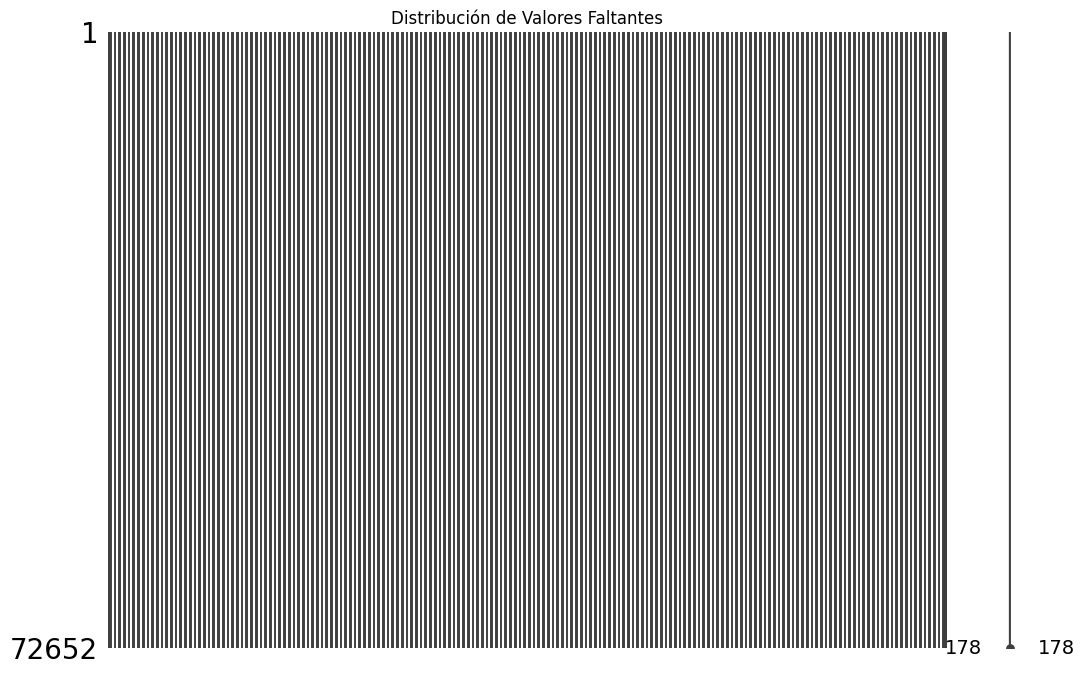

In [55]:
# Visualización de valores faltantes

import missingno as msno
import matplotlib.pyplot as plt

msno.matrix(df, figsize=(12, 8))
plt.title('Distribución de Valores Faltantes')
plt.show()


In [56]:
# Porcentaje de valores faltantes
missing_percent = df.isnull().sum() / len(df) * 100
missing_percent

match_risk_features.initial.itemLengthPerception    0.0
match_risk_features.initial.itemHeightPerception    0.0
match_risk_features.initial.itemWidthPerception     0.0
match_risk_features.initial.itemLengthManifest      0.0
match_risk_features.initial.itemHeightManifest      0.0
                                                   ... 
match_output.itemOrientation                        0.0
match_output.graspPerceptionDimensionsM.x           0.0
match_output.graspPerceptionDimensionsM.y           0.0
match_output.graspPerceptionDimensionsM.z           0.0
computed_success                                    0.0
Length: 178, dtype: float64

In [ ]:
!pip install seaborn


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached matplotlib-3.10.6-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.9-cp313-cp313-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-11.3.0-cp313-cp313-win_amd64.whl.metadata (9.2 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached matplotlib-3.10.6-cp313-cp313-win_amd64.whl (8.1 MB)
Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl (226 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ------------------ --------------------- 1.0/2.3 MB 5.0 MB/s eta 0:00:01
   ---------------------------------------- 2.3/2.3 MB 5.9 MB/s  0:00:00
Using cached kiwisolver-1.4.9-cp313-cp313-win_amd6


🔝 Correlaciones más altas con 'computed_success':
computed_success                                          1.000000
match_output.stowStrategy.rigidInsertionCost              0.268000
match_risk_features.dloL2                                 0.210394
match_risk_features.initial.dloL2                         0.207503
match_risk_features.tlo                                   0.207309
match_risk_features.initial.tlo                           0.206582
match_risk_features.initial.stowableWidthManifest         0.205854
match_risk_features.initial.clippedWidth                  0.194717
match_risk_features.stowableWidthManifest                 0.191345
match_risk_features.clippedWidth                          0.174656
match_risk_features.dlo                                   0.167220
match_output.stowStrategy.predictedSlotM.bottomRight.z    0.165000
match_output.stowStrategy.predictedSlotM.bottomLeft.z     0.165000
match_risk_features.initial.dlo                           0.155597
match_risk_

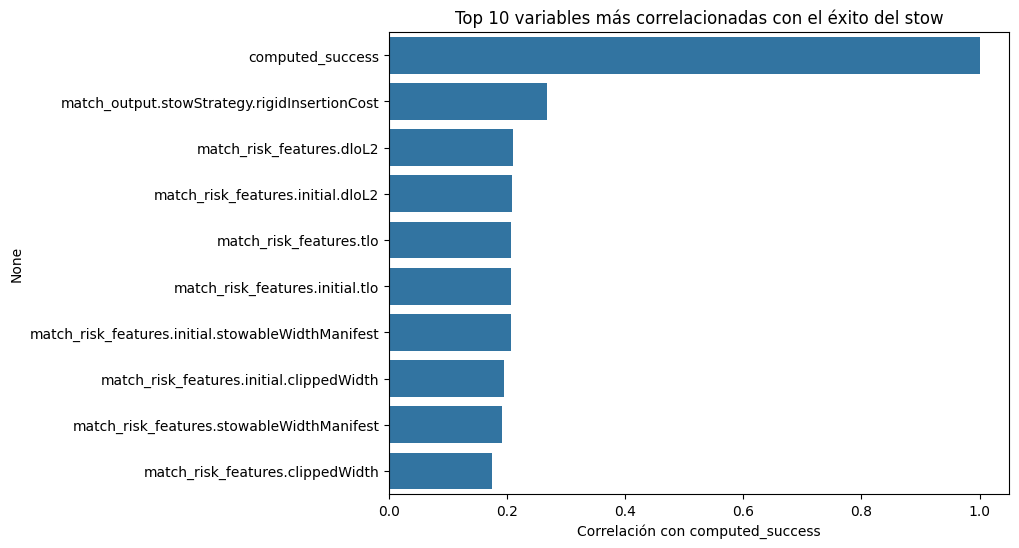

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr()
target_corr = corr[target].sort_values(ascending=False)

print("\n🔝 Correlaciones más altas con 'computed_success':")
print(target_corr.head(15))
print("\n🔻 Correlaciones más bajas:")
print(target_corr.tail(15))

# Gráfico top 10
plt.figure(figsize=(8, 6))
sns.barplot(x=target_corr.head(10).values, y=target_corr.head(10).index)
plt.title("Top 10 variables más correlacionadas con el éxito del stow")
plt.xlabel("Correlación con computed_success")
plt.show()


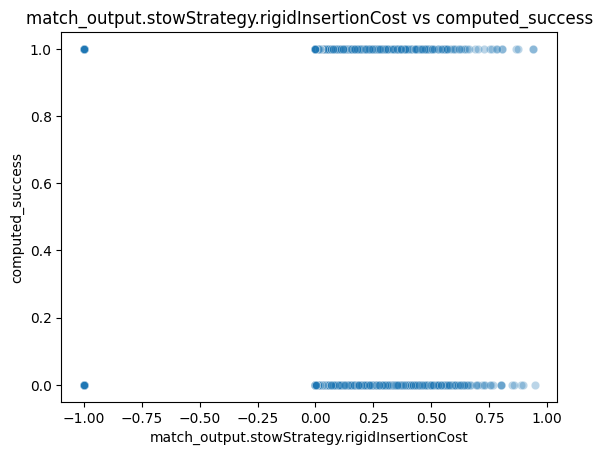

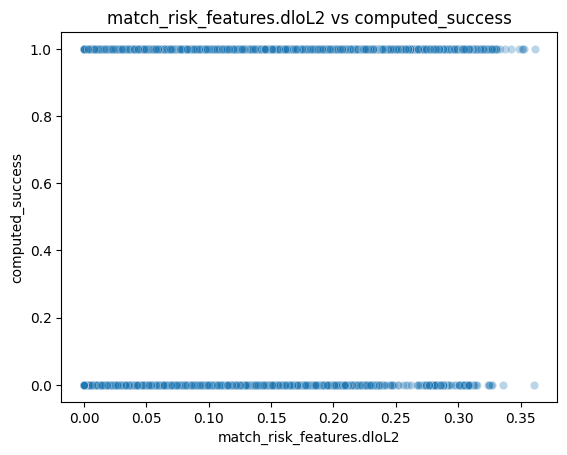

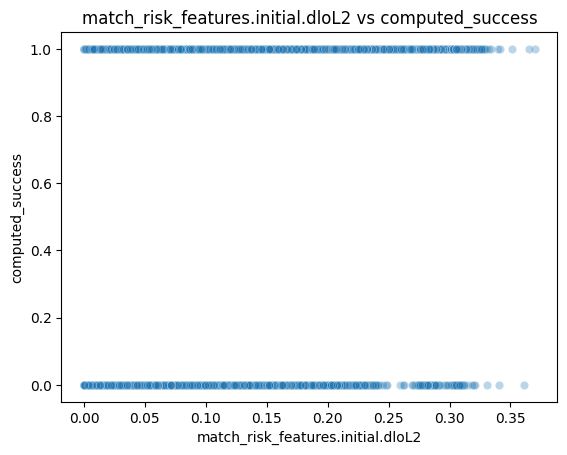

In [ ]:
top_features = target_corr.head(4).index.drop(target)
for col in top_features:
    sns.scatterplot(x=df[col], y=df[target], alpha=0.3)
    plt.title(f"{col} vs computed_success")
    plt.show()


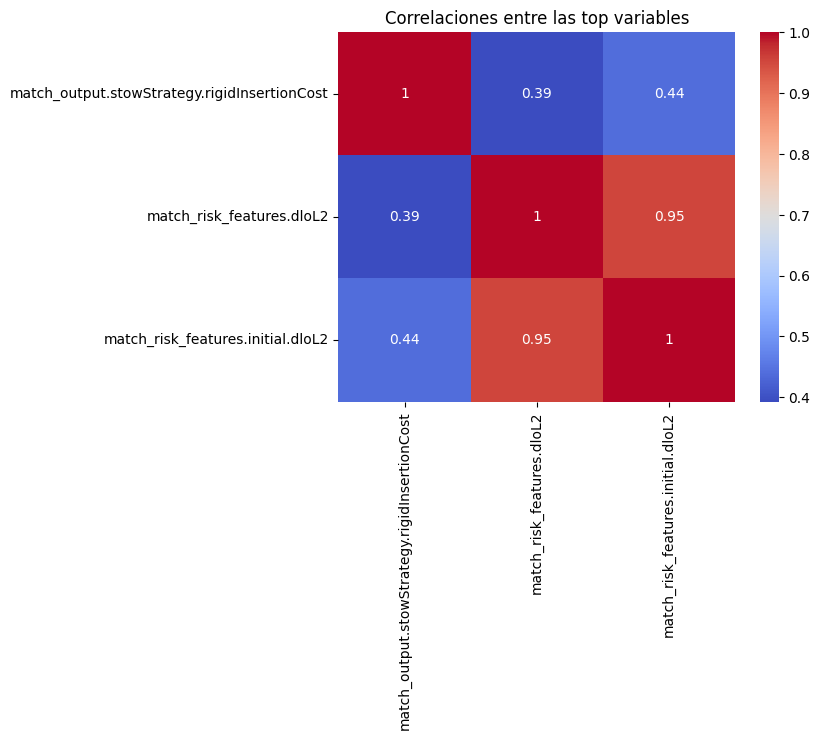

In [ ]:
sns.heatmap(df[top_features].corr(), annot=True, cmap='coolwarm')
plt.title("Correlaciones entre las top variables")
plt.show()


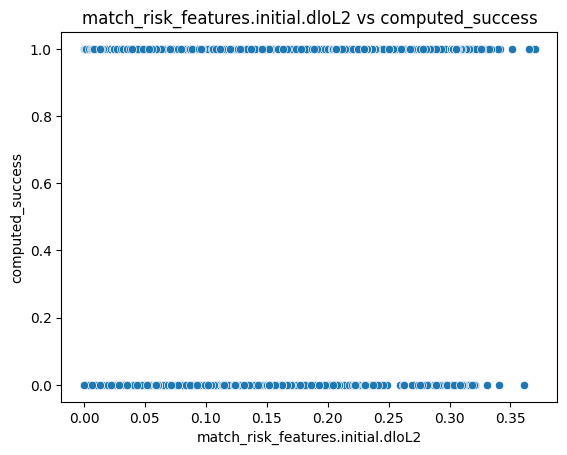

In [ ]:
sns.scatterplot(x=df[col], y=df['computed_success'])
plt.title(f'{col} vs computed_success')
plt.show()



Objetivo

Identificar las variables que más influyen en el éxito del proceso (computed_success) para priorizar análisis, optimización o modelado predictivo.

Variables con mayor correlación positiva
Variable	Correlación con computed_success
match_output.stowStrategy.rigidInsertionCost	0.268
match_risk_features.dloL2	                    0.210
match_risk_features.initial.dloL2	            0.208
match_risk_features.tlo	                        0.207
match_risk_features.initial.tlo              	0.207
match_risk_features.initial.stowableWidthManifest	0.206

Interpretación:

Características relacionadas con dimensiones de los objetos (dloL2, tlo, stowableWidthManifest) y la estrategia de inserción rígida (rigidInsertionCost) tienen mayor impacto en el éxito.

El efecto no es extremadamente fuerte (correlaciones < 0.3), indicando que el éxito depende de varias variables combinadas.

Conclusiones 

Priorizar variables con correlación > 0.2 para análisis de optimización o modelado predictivo.

Dimensiones iniciales y estrategias de stow son los factores más críticos para el éxito.

Variables con correlación cercana a cero pueden considerarse de bajo impacto, aunque se recomienda revisar consistencia y cobertura de datos (NaN).

Dado que las correlaciones son moderadas, se sugiere un análisis multivariable o modelado avanzado para capturar efectos combinados.